## Problem Set 2: Merging and regular expressions

**Total points (without extra credit)**: 30 

**Background on the policy context**: here, we're going to use two datasets to practice reshaping, merging, and regular expression patterns. Both datasets relate to the broader issue of which employers might be violating the rights of temporary guestworkers granted visas under the H-2A program. Here are some articles about potential exploitation of guestworkers by firms and inequality caused by minimal oversight:

- News media coverage of labor abuses of temporary guestworkers: https://www.buzzfeednews.com/article/kenbensinger/the-pushovers 
- GAO report on labor abuses of temporary guestworkers: https://www.gao.gov/products/gao-15-154

The following datasets are located in `pset2_inputdata` (need to unzip): 

- `jobs_clean`: a dataset of guestworker jobs posted by many employers, some of whom have been debarred (banned) from the program for labor abuses; others not debarred
- `debar`: a dataset of employers who committed violations of labor regulations meant to protect temporary guestworkers 


You can view a codebook here: https://docs.google.com/spreadsheets/d/1rF9GJEC8pPKxipD0TsoG9DVdqz3EJ-b-BHEtyioAX7I/edit?usp=sharing


In [2]:
## helpful packages
import pandas as pd
import numpy as np
import random
import re
import os

## repeated printouts
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


# 1. Reshaping data (13 points total)

Load the following dataset stored in `pset2_inputdata`: `debar.csv`

This represents employers temporarily banned from hiring workers (debar.csv); call this `debar`


View the head()


In [5]:
## your code here
debar = pd.read_csv('./pset2_inputdata/debar.csv')

debar.head()

,Name,"City, State",Violation,Duration,Start date,End date
0,J&J Harvesting,"Leads, ND",Failure to respond to audit (partial response),2 years,1/19/2014,1/18/2016
1,"Stahlman Apiaries, Inc","Selby, SD",Failure to respond to audit (partial response),1 year,2/19/2015,2/14/2016
2,Trust Nursery,"Pulaski, NY",Failure to respond to audit (partial response),1 year,3/21/2014,3/20/2015
3,Anton Fertilizer Inc.,"Dighton, KS",Failure to respond to audit (no response),2 years,3/30/2014,3/29/2016
4,"Great Plains Fluid Service, Inc.","Greensburg, KS",Failure to respond to audit (no response),2 years,3/30/2014,3/29/2016


## 1.1 (1 point)

Print the number of rows in `debar` versus the number of unique employer names (`Name`). Is there one row per employer or multiple rows for some employers?

In [7]:
## your code here
row_count = len(debar)
print("debar row_count:",row_count)
num_unique = debar['Name'].nunique()
print("unique employer names:",num_unique)

print("Since there are more rows than number of unique employers, there are multiple rows for some employers")


debar row_count: 114
unique employer names: 98
Since there are more rows than number of unique employers, there are multiple rows for some employers


## 1.2 Investigating duplicated rows (2 points)

A. Create a new column in `debar`--`is_repeated`-- that tells us whether an employer (`Name`) is repeated > 1 times

*Hint*: there are multiple ways to solve this but some possibilities to get the list of names that are repeated are:
- Using value_counts() on the `Name` variable and extracting the index from that value counts 
- Using groupby to count the rows attached to one name

B. Print the rows where `is_repeated == True` and interpret

C. Subset to the rows where `is_repeated == True` and save that data as `mult_debar`. Print the head() and shape

In [9]:
## your code here
rname = debar.Name.value_counts()
repeats = rname[rname > 1].index
debar["is_repeated"] = debar.Name.isin(repeats)

debar[debar.is_repeated==True]
#The majority of firms with repeated violations are related to auditing procedures and occurred between 2014-2015. 

mult_debar = debar[debar.is_repeated==True]
mult_debar.head()
mult_debar.shape

,Name,"City, State",Violation,Duration,Start date,End date,is_repeated
6,Annabella Land & Cattle,"Annabella, UT",Non Payment,1 year,5/9/2014,5/9/2015,True
7,Autumn Hill Orchard,"Groton, MA",Failure to respond to audit (no response),2 years,7/6/2014,7/5/2016,True
8,"Caddo Creek Ranch, dba Paradise Ranch","Caddo, TX",Failure to respond to audit (partial response),2 years,7/20/2014,7/19/2016,True
11,Loewen Harvesting LLC,"Brownsville, TX",Failure to respond to audit (partial response),1 year,8/20/2014,8/19/2015,True
12,Rollo Farm Labor Contractor,"Miami, FL",Failure to respond to audit (no response),2 years,8/23/2014,8/22/2016,True
14,Sharon Mathis,"Tifton, GA",Failure to respond to audit (no response),2 years,11/16/2014,11/15/2016,True
15,SRT Farms,"Morton, TX",Failure to respond to audit (no response),2 years,11/16/2014,11/15/2016,True
16,Mark Duncan,"Roosevelt, UT",Failure to respond to audit (no response),2 years,11/16/2014,11/15/2016,True
17,"Maple Ridge Custom Services, LLC","Altheimer, AK",Failure to respond to audit (partial response),2 years,11/16/2014,11/15/2016,True
18,F&W Farms,"Ingalls, KS",Failure to respond to audit (partial response),2 years,12/10/2014,12/9/2016,True


,Name,"City, State",Violation,Duration,Start date,End date,is_repeated
6,Annabella Land & Cattle,"Annabella, UT",Non Payment,1 year,5/9/2014,5/9/2015,True
7,Autumn Hill Orchard,"Groton, MA",Failure to respond to audit (no response),2 years,7/6/2014,7/5/2016,True
8,"Caddo Creek Ranch, dba Paradise Ranch","Caddo, TX",Failure to respond to audit (partial response),2 years,7/20/2014,7/19/2016,True
11,Loewen Harvesting LLC,"Brownsville, TX",Failure to respond to audit (partial response),1 year,8/20/2014,8/19/2015,True
12,Rollo Farm Labor Contractor,"Miami, FL",Failure to respond to audit (no response),2 years,8/23/2014,8/22/2016,True


(32, 7)

## 1.3 Reshape mult_debar to wide to begin filtering out duplicates (4 points)

You want to separate out two cases:

- Cases where the repeat rows for one employer are due to duplicated data 
- Cases where the repeat rows for one employer represent repeated violations for different issues

There are various ways to check duplicates in this data (eg converting `Violation` to lowercase; replacing spelled-out states with two-dig state codes)

We're going to use the simple rule of:

- A row is a duplicate if, within an employer (defined by Name + City, State), the Start date for each row's violation is the same 

To begin to check this, reshape `mult_debar` to a wide dataframe (`mult_debar_wide`) with the following columns, treating the `Name` and `City, State` as the index for the pivot:

- Name
- City, State
- start_date_viol1
- start_date_viol2

Print the head and shape

In [55]:
## your code here
# Make a clean copy to avoid SettingWithCopyWarning
mult_debar = mult_debar.copy()

# Assign a violation number per violator
mult_debar['viol_num'] = mult_debar.groupby('Name').cumcount() + 1

# Pivot to wide format
mult_debar_wide = mult_debar.pivot(index='Name', columns='viol_num', values='Start date')

# Rename columns (assuming each violator has at most 2 violations)
mult_debar_wide.columns = ['start_date_viol1', 'start_date_viol2']

# Define state abbreviations
state_abbrev = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR',
    'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE',
    'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID',
    'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
    'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
    'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV',
    'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY',
    'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT',
    'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV',
    'Wisconsin': 'WI', 'Wyoming': 'WY'
}

# Apply state abbreviation replacement safely
mult_debar['City, State'] = mult_debar['City, State'].apply(
    lambda x: x.replace(x.split(', ')[-1], state_abbrev.get(x.split(', ')[-1], x.split(', ')[-1]))
)

# Map city/state back to wide format
city_state_map = mult_debar.drop_duplicates('Name')[['Name', 'City, State']].set_index('Name')
mult_debar_wide['City, State'] = mult_debar_wide.index.map(city_state_map['City, State'])

# Reorder columns to put "City, State" first
cols = mult_debar_wide.columns.tolist()
cols.remove('City, State')
cols.insert(0, 'City, State')
mult_debar_wide = mult_debar_wide[cols]

# Preview
mult_debar_wide.head()
mult_debar_wide.shape


,"City, State",start_date_viol1,start_date_viol2
Name,,,
Annabella Land & Cattle,"Annabella, UT",5/9/2014,5/9/2014
Autumn Hill Orchard,"Groton, MA",7/6/2014,7/6/2014
"Caddo Creek Ranch, dba Paradise Ranch","Caddo, TX",7/20/2014,7/20/2014
Cisco Produce Inc.,"Cairo, GA",12/10/2014,12/10/2015
Dove Creek Farms,"Mount Vernon, TX",2/9/2018,2/9/2018


(16, 3)

## 1.4 Filter out duplicates from original debar data (6 points)

A. Using `mult_debar_wide`, add a column `is_dup` that takes value of True for cases where start_date_viol1 == start_date_viol2 marking the row as a duplicate

B. Going back to the original long-format data you loaded at the beginning- `debar`
    - For employers where `is_dup == True` as indicated by your wide-format dataframe, only keep `violnum == viol1`
    - For all other employers (so is_dup == False and ones we didnt need to check duplicates for), keep all violnum
    - Remove the `is_repeated` column from the `debar` data

**Hint**: you can complete part B without a for loop; `pd.concat` with axis = 0 (row binding) is one way

Call the resulting dataframe `debar_clean` and print the shape and # of unique employer names

In [13]:
## your code here
mult_debar_wide["is_dup"] = mult_debar_wide.start_date_viol1 == mult_debar_wide.start_date_viol2

debar_copy = debar.copy()

debar_copy = debar_copy.merge(mult_debar_wide[['is_dup']], left_on='Name', right_index=True, how='left')
debar_copy['violnum'] = debar_copy.groupby('Name').cumcount() + 1

dup_filtered = debar_copy[(debar_copy['is_dup'] == True) & (debar_copy['violnum'] == 1)]
nondup_filtered = debar_copy[debar_copy['is_dup'] != True]

debar_clean = pd.concat([dup_filtered, nondup_filtered], axis=0)
debar_clean[debar_clean.violnum>1]

,Name,"City, State",Violation,Duration,Start date,End date,is_repeated,is_dup,violnum
51,Old Tree Farms/Verpaalen Custom Service,"Volga, SD",Wage Hour Debarment,3 years,12/1/2014,12/1/2017,True,False,2
56,Cisco Produce Inc.,"Cairo, GA",Impeding the Audit Process – Non- Response,2 years,12/10/2015,12/9/2017,True,False,2
89,Xavier Horne,"Lyons, Georgia",Failure to respond to audit request,2 years,9/27/2017,9/26/2019,True,False,2


# 2. Merging and regex (17 points total)



## 2.1 Load data on job postings

The previous dataset contains a small subset of employers who faced temporary bans due to violations of H-2A program regulations

Since most of the bans have expired, we're going to see which of those employers posted new H-2A jobs in the first quarter of 2021 

Loading the `jobs_clean.csv` data stored in `pset2_inputdata`

In [16]:
# your code here to load the data 
jobs = pd.read_csv('./pset2_inputdata/jobs.csv')

jobs.head()

,CASE_NUMBER,CASE_STATUS,RECEIVED_DATE,DECISION_DATE,TYPE_OF_EMPLOYER_APPLICATION,H2A_LABOR_CONTRACTOR,NATURE_OF_TEMPORARY_NEED,EMERGENCY_FILING,EMPLOYER_NAME,TRADE_NAME_DBA,...,ADDENDUM_B_HOUSING_ATTACHED,TOTAL_HOUSING_RECORDS,MEALS_PROVIDED,MEALS_CHARGED,MEAL_REIMBURSEMENT_MINIMUM,MEAL_REIMBURSEMENT_MAXIMUM,PHONE_TO_APPLY,EMAIL_TO_APPLY,WEBSITE_TO_APPLY,TOTAL_ADDENDUM_A_RECORDS
0,H-300-20199-721302,Determination Issued - Withdrawn,2020-07-17 14:50:40.840,2020-10-01 00:00:00.000,Individual Employer,N,Seasonal,Y,"Fazio Farms Operating Company, LLC",NaN,...,N,1,Y,12.68,12.68,55.0,13607017661,faziofarms@gmail.com,NaN,0
1,H-300-20231-773906,Determination Issued - Certification,2020-08-20 10:38:15.620,2020-10-01 00:00:00.000,Association - Agent,N,Seasonal,N,Charlie Sunderland,Panter & Sunderland Nursery,...,N,1,N,NaN,12.68,55.0,19318083783,NaN,https://www.jobs4tn.gov/vosnet/Default.aspx,0
2,H-300-20231-774123,Determination Issued - Certification,2020-08-24 15:33:14.340,2020-10-01 00:00:00.000,Individual Employer,N,Seasonal,N,Michael Rudebusch,NaN,...,N,1,N,NaN,12.68,55.0,19369333827,fayethlynpitre@rocketmail.com,NaN,0
3,H-300-20231-774151,Determination Issued - Certification,2020-08-21 12:08:09.760,2020-10-01 00:00:00.000,Individual Employer,N,Seasonal,N,Lodahl Farms,NaN,...,Y,2,N,NaN,12.68,55.0,14069637560,lodahl_kelsey@yahoo.com,NaN,0
4,H-300-20231-774508,Determination Issued - Certification,2020-08-20 10:17:34.530,2020-10-01 00:00:00.000,Individual Employer,Y,Seasonal,N,"Dunson Harvesting, Inc.","Dunson Harvesting, Inc.",...,Y,8,N,NaN,12.68,55.0,18632939888,NaN,www.employflorida.com,4


##  2.2 Try inner join on employer name  (2 points)

- Use the `EMPLOYER_NAME` field of the `jobs` dataset
- Use the `Name` field of the `debar_clean` dataset 

A. Use pd.merge with an inner join on those fields to see whether there are any exact matches. 

B. If there are exact matches, print the row(s) with exact matches



In [18]:
## your code here

merged = pd.merge(jobs, debar_clean,left_on='EMPLOYER_NAME', right_on='Name',how='inner')
merged


,CASE_NUMBER,CASE_STATUS,RECEIVED_DATE,DECISION_DATE,TYPE_OF_EMPLOYER_APPLICATION,H2A_LABOR_CONTRACTOR,NATURE_OF_TEMPORARY_NEED,EMERGENCY_FILING,EMPLOYER_NAME,TRADE_NAME_DBA,...,TOTAL_ADDENDUM_A_RECORDS,Name,"City, State",Violation,Duration,Start date,End date,is_repeated,is_dup,violnum
0,H-300-20287-876656,Determination Issued - Certification,2020-10-20 09:20:32.010,2020-11-09 00:00:00.000,Individual Employer,Y,Seasonal,Y,Rafael Barajas,NaN,...,7,Rafael Barajas,"Sebring, Florida",Non-payment of certification fee,1 year,9/23/2016,9/22/2017,False,NaN,1


## 2.3 Targeted regex (10 points total)

You want to see if you can increase the exact match rate with some basic cleaning of each 
of the employer name fields in each dataset 

### 2.3.1 Converting to upper (2 points)

A. Convert the `EMPLOYER_NAME` and `Name` fields to uppercase using list comprehension rather than df.varname.str.upper() (it's fine to do a separate list comprehension line for each of the two columns)

B. Print a random sample of 15 values of each result

C. Assign the full vector of uppercase names back to the original data, writing over the original `EMPLOYER_NAME` and `Name` columns 


In [21]:
## insert your code to turn into uppercase here
jobs['EMPLOYER_NAME']=[name.upper() for name in jobs.EMPLOYER_NAME]
debar_clean['NAME']=[name.upper() for name in debar_clean.Name]

In [22]:
## insert your code for the random sample
jobs.EMPLOYER_NAME.sample(15)
debar_clean.Name.sample(15)

2038                       TAYLOR RANCH
867                BRYAN LEONARDS FARMS
2545                       BRADLEY HART
521              B&T FARMS, PARTNERSHIP
1455                PETER LAFLEUR FARMS
2552                 RJR FOUR FARMS PTN
2001          WESTERN RANGE ASSOCIATION
1452                701 HARVESTING, LLC
970               C & K LINK PARTERSHIP
1789    HART'S GREENHOUSE & FLORIST LLC
1705         HAWAII ISLAND HONEY CO LLC
2595                AMAZING GRAINS FARM
2540                     AARON NORDWICK
368                  LIL E-Z FARM, INC.
1965                      LORIN JOHNSON
Name: EMPLOYER_NAME, dtype: object

106                    Turner Farms
88                    Yesenia Perez
44                   Chris Robinson
13                    Reimer's Inc.
80                  M Keneston Corp
64               Gonzalo Fernandez*
91         Avoyelles Honey Co., LLC
15                        SRT Farms
1            Stahlman Apiaries, Inc
14                    Sharon Mathis
70         John & Neta Leopky Farms
83                Cira Cortez Lopez
11            Loewen Harvesting LLC
72     Saxtons River Orchards, Inc.
94                     69 Farms LLC
Name: Name, dtype: object

In [23]:
## insert your code for assigning the uppercase names back to the data

#already assigned in part A

### 2.3.2 Cleaning up punctuation (4 points)

You notice that INC, CO, and LLC are sometimes followed by a period (.) but sometimes not

A. For each dataset, write a regex pattern using `re.sub` to remove the . but only if it's preceded by INC, LLC, or CO 

Make sure LLC, INC, CO remain part of the string but just without the dot

B. Test the pattern on the positive and negative example we provide below and print the result. See the Github issue for examples of what to return


**Hint**: https://stackoverflow.com/questions/7191209/python-re-sub-replace-with-matched-content



In [25]:
pos_example_1 = "CISCO PRODUCE INC."
pos_example_2 = "AVOYELLES HONEY CO., LLC"
neg_example = "E.V. RANCH LLP"

In [26]:
## insert your code here with the regex pattern for part A
pattern = r"(\s+)(INC|LLC|CO)\."

## insert your code to use re.sub to apply the pattern to the test cases for part B
re.sub(pattern,r"\1\2",pos_example_1)
re.sub(pattern,r"\1\2",pos_example_2)
re.sub(pattern,r"\1\2",neg_example)

'CISCO PRODUCE INC'

'AVOYELLES HONEY CO, LLC'

'E.V. RANCH LLP'

### 2.3.3 (4 points)

Use that pattern in conjunction with `re.sub` and list comprehension to clean the employer name columns in each dataset. Save the new columns as `name_clean` in each. Then, use row subsetting to (1) subset to rows that changed names and (2) for:

- `debar_clean` print the `Name` and `name_clean` columns
- `jobs` print the `EMPLOYER_NAME` and `name_clean` columns

Make sure to use the uppercase versions of the variables


In [28]:
## your code here to clean the columns
pattern = r"(\s+)(INC|LLC|CO)\."

debar_clean['name_clean'] = [re.sub(pattern,r"\1\2",name) for name in debar_clean.NAME] 
jobs['name_clean'] = [re.sub(pattern,r"\1\2",name) for name in jobs.EMPLOYER_NAME]


debar_clean[debar_clean.NAME != debar_clean.name_clean][['NAME','name_clean']]
jobs[jobs.EMPLOYER_NAME != jobs.name_clean][['EMPLOYER_NAME','name_clean']]


,NAME,name_clean
3,ANTON FERTILIZER INC.,ANTON FERTILIZER INC
4,"GREAT PLAINS FLUID SERVICE, INC.","GREAT PLAINS FLUID SERVICE, INC"
5,PROMAX INC.,PROMAX INC
13,REIMER'S INC.,REIMER'S INC
19,CISCO PRODUCE INC.,CISCO PRODUCE INC
23,REIMER’S INC.,REIMER’S INC
33,GERONIMO SHEEP CO.,GERONIMO SHEEP CO
46,ALTENDORF TRANSPORT INC.,ALTENDORF TRANSPORT INC
56,CISCO PRODUCE INC.,CISCO PRODUCE INC
72,"SAXTONS RIVER ORCHARDS, INC.","SAXTONS RIVER ORCHARDS, INC"


,EMPLOYER_NAME,name_clean
4,"DUNSON HARVESTING, INC.","DUNSON HARVESTING, INC"
7,"FARM LABOR ASSOCIATION FOR GROWERS, INC.","FARM LABOR ASSOCIATION FOR GROWERS, INC"
14,"MCLAIN FARMS, INC.","MCLAIN FARMS, INC"
17,"BONNIE PLANTS, INC.","BONNIE PLANTS, INC"
18,"B & W QUALITY GROWERS, INC.","B & W QUALITY GROWERS, INC"
...,...,...
2700,HARRAL LIVESTOCK CO. LLC,HARRAL LIVESTOCK CO LLC
2701,ECOSYSTEM CONCEPTS INC.,ECOSYSTEM CONCEPTS INC
2702,SIDDOWAY SHEEP CO.,SIDDOWAY SHEEP CO
2705,SATHER MANAGEMENT INC.,SATHER MANAGEMENT INC


In [29]:
## your code here to print the head
debar_clean.head()
jobs.head()


,Name,"City, State",Violation,Duration,Start date,End date,is_repeated,is_dup,violnum,NAME,name_clean
6,Annabella Land & Cattle,"Annabella, UT",Non Payment,1 year,5/9/2014,5/9/2015,True,True,1,ANNABELLA LAND & CATTLE,ANNABELLA LAND & CATTLE
7,Autumn Hill Orchard,"Groton, MA",Failure to respond to audit (no response),2 years,7/6/2014,7/5/2016,True,True,1,AUTUMN HILL ORCHARD,AUTUMN HILL ORCHARD
8,"Caddo Creek Ranch, dba Paradise Ranch","Caddo, TX",Failure to respond to audit (partial response),2 years,7/20/2014,7/19/2016,True,True,1,"CADDO CREEK RANCH, DBA PARADISE RANCH","CADDO CREEK RANCH, DBA PARADISE RANCH"
11,Loewen Harvesting LLC,"Brownsville, TX",Failure to respond to audit (partial response),1 year,8/20/2014,8/19/2015,True,True,1,LOEWEN HARVESTING LLC,LOEWEN HARVESTING LLC
12,Rollo Farm Labor Contractor,"Miami, FL",Failure to respond to audit (no response),2 years,8/23/2014,8/22/2016,True,True,1,ROLLO FARM LABOR CONTRACTOR,ROLLO FARM LABOR CONTRACTOR


,CASE_NUMBER,CASE_STATUS,RECEIVED_DATE,DECISION_DATE,TYPE_OF_EMPLOYER_APPLICATION,H2A_LABOR_CONTRACTOR,NATURE_OF_TEMPORARY_NEED,EMERGENCY_FILING,EMPLOYER_NAME,TRADE_NAME_DBA,...,TOTAL_HOUSING_RECORDS,MEALS_PROVIDED,MEALS_CHARGED,MEAL_REIMBURSEMENT_MINIMUM,MEAL_REIMBURSEMENT_MAXIMUM,PHONE_TO_APPLY,EMAIL_TO_APPLY,WEBSITE_TO_APPLY,TOTAL_ADDENDUM_A_RECORDS,name_clean
0,H-300-20199-721302,Determination Issued - Withdrawn,2020-07-17 14:50:40.840,2020-10-01 00:00:00.000,Individual Employer,N,Seasonal,Y,"FAZIO FARMS OPERATING COMPANY, LLC",NaN,...,1,Y,12.68,12.68,55.0,13607017661,faziofarms@gmail.com,NaN,0,"FAZIO FARMS OPERATING COMPANY, LLC"
1,H-300-20231-773906,Determination Issued - Certification,2020-08-20 10:38:15.620,2020-10-01 00:00:00.000,Association - Agent,N,Seasonal,N,CHARLIE SUNDERLAND,Panter & Sunderland Nursery,...,1,N,NaN,12.68,55.0,19318083783,NaN,https://www.jobs4tn.gov/vosnet/Default.aspx,0,CHARLIE SUNDERLAND
2,H-300-20231-774123,Determination Issued - Certification,2020-08-24 15:33:14.340,2020-10-01 00:00:00.000,Individual Employer,N,Seasonal,N,MICHAEL RUDEBUSCH,NaN,...,1,N,NaN,12.68,55.0,19369333827,fayethlynpitre@rocketmail.com,NaN,0,MICHAEL RUDEBUSCH
3,H-300-20231-774151,Determination Issued - Certification,2020-08-21 12:08:09.760,2020-10-01 00:00:00.000,Individual Employer,N,Seasonal,N,LODAHL FARMS,NaN,...,2,N,NaN,12.68,55.0,14069637560,lodahl_kelsey@yahoo.com,NaN,0,LODAHL FARMS
4,H-300-20231-774508,Determination Issued - Certification,2020-08-20 10:17:34.530,2020-10-01 00:00:00.000,Individual Employer,Y,Seasonal,N,"DUNSON HARVESTING, INC.","Dunson Harvesting, Inc.",...,8,N,NaN,12.68,55.0,18632939888,NaN,www.employflorida.com,4,"DUNSON HARVESTING, INC"


## 2.4 More joins and more cleaning (5 points)

A. Conduct another inner join between `jobs` and `debar_clean` now using the `name_clean` column; print the result. Did the cleaning result in any more employers matched between the two datasets?

B. Create a new column in `debar_clean` called `name_clean_2` that uses regex to take the following name in that dataset:

- `SLASH E.V. RANCH LLP` in the `debar_clean` dataset

And cleans it up so that it matches with this employer in `jobs`

- `SLASH EV RANCH` in the `jobs` dataset

Eg a pattern to remove the dots in the EV and the space+LLP-- you can apply the pattern to all employer names in debar_clean (so don't need to worry about only applying it to that one employer)


C. Conduct a left join using `name_clean_2` as the join column where the left hand dataframe is `jobs`; right hand dataframe is `debar_clean`, store the result as a dataframe, and print the rows where the merge indicator indicates the row was found in both dataframe

**Note**: this manual cleaning process is inefficient and helps motivate why talked about fuzzy matching. Fuzzy matching could recognize that Slash EV ranch is a highly similar string to slash ev ranch llp and match them without us needing to use regex to make the strings identical.

In [61]:
## your code here
clean_matches = pd.merge(
    jobs,
    debar_clean,
    left_on="name_clean",
    right_on="name_clean",
    how="inner"
)
clean_matches
print("\n We have one match for RAFAEL BARAJAS using Part A. \n")
pattern2 = r"\b([A-Z])\.(?=[A-Z])|\.| LLP$"
debar_clean["name_clean_2"] = [
    re.sub(pattern2, r"\1", name) for name in debar_clean["name_clean"]
]
debar_clean["name_clean_2"].head()
fuzzy_merge = pd.merge(
    jobs,
    debar_clean,
    left_on="name_clean",
    right_on="name_clean_2",
    how="left",
    indicator=True,
    suffixes=("_jobs", "_debar")
)
matches = fuzzy_merge[fuzzy_merge["_merge"] == "both"]
matches.head()

,CASE_NUMBER,CASE_STATUS,RECEIVED_DATE,DECISION_DATE,TYPE_OF_EMPLOYER_APPLICATION,H2A_LABOR_CONTRACTOR,NATURE_OF_TEMPORARY_NEED,EMERGENCY_FILING,EMPLOYER_NAME,TRADE_NAME_DBA,...,Duration,Start date,End date,is_repeated,is_dup,violnum,NAME,name_clean_2,co_name,ind_name
0,H-300-20287-876656,Determination Issued - Certification,2020-10-20 09:20:32.010,2020-11-09 00:00:00.000,Individual Employer,Y,Seasonal,Y,RAFAEL BARAJAS,NaN,...,1 year,9/23/2016,9/22/2017,False,NaN,1,RAFAEL BARAJAS,RAFAEL BARAJAS,RAFAEL BARAJAS,RAFAEL BARAJAS



 We have one match for RAFAEL BARAJAS using Part A. 



6                   ANNABELLA LAND & CATTLE
7                       AUTUMN HILL ORCHARD
8     CADDO CREEK RANCH, DBA PARADISE RANCH
11                    LOEWEN HARVESTING LLC
12              ROLLO FARM LABOR CONTRACTOR
Name: name_clean_2, dtype: object

,CASE_NUMBER,CASE_STATUS,RECEIVED_DATE,DECISION_DATE,TYPE_OF_EMPLOYER_APPLICATION,H2A_LABOR_CONTRACTOR,NATURE_OF_TEMPORARY_NEED,EMERGENCY_FILING,EMPLOYER_NAME,TRADE_NAME_DBA,...,End date,is_repeated,is_dup,violnum,NAME,name_clean_debar,name_clean_2,co_name,ind_name,_merge
791,H-300-20287-876656,Determination Issued - Certification,2020-10-20 09:20:32.010,2020-11-09 00:00:00.000,Individual Employer,Y,Seasonal,Y,RAFAEL BARAJAS,NaN,...,9/22/2017,False,NaN,1.0,RAFAEL BARAJAS,RAFAEL BARAJAS,RAFAEL BARAJAS,RAFAEL BARAJAS,RAFAEL BARAJAS,both
1115,H-300-20306-894148,Determination Issued - Certification,2020-11-02 18:11:29.140,2020-11-24 00:00:00.000,Individual Employer,N,Seasonal,N,SLASH EV RANCH,NaN,...,11/14/2015,False,NaN,1.0,SLASH E.V. RANCH LLP,SLASH E.V. RANCH LLP,SLASH EV RANCH,SLASH E.V. RANCH LLP,SLASH E.V. RANCH LLP,both


# 3. Optional extra credit 1: regex to separate companies from individuals (1 point)

You notice some employers in `debar_clean` have both the name of the company and the name of individual, e.g.:
    
COUNTY FAIR FARM (COMPANY) AND ANDREW WILLIAMSON (INDIVIDUAL)*

Use the uppercase/cleaned `name_clean` in `debar_clean`

A. Write a regex pattern that does the following:
    - Captures the pattern that occurs before COMPANY if (COMPANY) is in string; so in example above, extracts COUNTY FAIR FARM 
    - Captures the pattern that occurs before INDIVIDUAL if (INDIVIDUAL) is also in string -- so in above, extracts ANDREW WILLIAMSON (so omit the "and")
    
B. Test the pattern on `pos_example` and `neg_example`-- make sure former returns a list (if using find.all) or match object (if using re.search) with the company name and individual name separated out; make sure latter returns empty
    
**Hints and resources**: for step A, you can either use re.search, re.match, or re.findall; don't worry about matching B&R Harvesting and Paul Cruz (Individual)

- Same regex resources as above
    

In [33]:
pos_example = "COUNTY FAIR FARM (COMPANY) AND ANDREW WILLIAMSON (INDIVIDUAL)*"
neg_example = "CISCO PRODUCE INC"

## your code here to define the pattern
import re

pattern = r"^(.*?)\s+\(COMPANY\)\s+AND\s+(.*?)\s+\(INDIVIDUAL\)"

## your code here to apply it to the pos_example
match_pos = re.search(pattern, pos_example)
result_pos = match_pos.groups() if match_pos else []

## your code here to apply it to the negative example
match_neg = re.search(pattern, neg_example)
result_neg = match_neg.groups() if match_neg else []

## Results
result_pos, result_neg


(('COUNTY FAIR FARM', 'ANDREW WILLIAMSON'), [])

C. Iterate over the `name_clean` column in debar and use regex to create two new columns in `debar_clean`:
   - `co_name`: A column for company (full `name_clean` string if no match; pattern before COMPANY if one extracted)
   - `ind_name`: A column for individual (full `name_clean` string if no match; pattern before INDIVIDUAL if one extracted)
 


In [35]:
# your code here
pattern = r"^(.*?)\s+\(COMPANY\)\s+AND\s+(.*?)\s+\(INDIVIDUAL\)"

# Define extraction function
def extract_names(name):
    match = re.search(pattern, name)
    if match:
        return pd.Series([match.group(1), match.group(2)])
    else:
        return pd.Series([name, name])

# Apply to debar_clean
debar_clean[['co_name', 'ind_name']] = debar_clean['name_clean'].apply(extract_names)

# Filter for rows where company and individual were successfully split
both_extracted = debar_clean[debar_clean['co_name'] != debar_clean['ind_name']]

# Display result
both_extracted[['name_clean', 'co_name', 'ind_name']]

,name_clean,co_name,ind_name
108,COUNTY FAIR FARM (COMPANY) AND ANDREW WILLIAMS...,COUNTY FAIR FARM,ANDREW WILLIAMSON


   
D. Print three columns for the rows in `debar_clean` containing the negative example and positive example described above (county fair farm and cisco produce):

- `name_clean`
- `co_name`
- `ind_name`
- `Violation`

**Note**: as shown in the outcome there may be duplicates of the same company reflecting different violations

In [37]:
# your code here
examples = ['COUNTY FAIR FARM', 'CISCO PRODUCE']

matches = debar_clean[debar_clean['name_clean'].str.contains('|'.join(examples), case=False)]

# Display relevant columns
matches[['name_clean', 'co_name', 'ind_name', 'Violation']]

,name_clean,co_name,ind_name,Violation
19,CISCO PRODUCE INC,CISCO PRODUCE INC,CISCO PRODUCE INC,Failure to respond to audit (no response)
56,CISCO PRODUCE INC,CISCO PRODUCE INC,CISCO PRODUCE INC,Impeding the Audit Process – Non- Response
108,COUNTY FAIR FARM (COMPANY) AND ANDREW WILLIAMS...,COUNTY FAIR FARM,ANDREW WILLIAMSON,WHD Debarment


# 4. Optional extra credit 2 (up to 3 points)

- For 1 point extra credit, create a visualization with 1+ of the existing fields in either the raw `jobs` or `debar` data. We'll be showing cool visualizations in class so use your imagination! Options could include visualizing between-state or over-time variation

- For 3 points extra credit instead, geocode the employer addresses in `jobs` and plot the addresses of jobs as points overlaid on top of a map of Georgia 
    - **Note**: this extra credit involves Googling since we have not yet covered spatial data. 
        - For discussion of how to geocode addresses -> lat/long, see: https://www.natasshaselvaraj.com/a-step-by-step-guide-on-geocoding-in-python/ 
        - For discussion of plotting lat/long dots against a map, see this discussion of geopandas: https://towardsdatascience.com/plotting-maps-with-geopandas-428c97295a73
    - Relevant columns include `EMPLOYER_ADDRESS_1` 
    - The geocoding might have a long runtime so feel free to implement it in a separate .py script that you submit alongside your notebook and to just read in the geocoded data

In [40]:
pip install geopy geopandas matplotlib contextily

Note: you may need to restart the kernel to use updated packages.


## your code here
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
from tqdm import tqdm
import pandas as pd

# Initialize geocoder
geolocator = Nominatim(
    user_agent="dartmouth-pset2/1.0 (purin.trak@gmail.com)",
    timeout=10
)
geocode = RateLimiter(
    geolocator.geocode,
    min_delay_seconds=1.5,         
    max_retries=5,                 
    error_wait_seconds=10,        
    swallow_exceptions=True
)

# Make copy of jobs dataset
jobs_subset = jobs.copy()
jobs_subset['full_address'] = jobs_subset['EMPLOYER_ADDRESS_1'] + ', Georgia, USA'

# Setup containers
locations = []
latitudes = []
longitudes = []

# Loop through addresses with progress bar
for i, address in tqdm(enumerate(jobs_subset['full_address']), total=len(jobs_subset)):
    location = geocode(address)
    locations.append(location)
    latitudes.append(location.latitude if location else None)
    longitudes.append(location.longitude if location else None)

    # Save every 25 records
    if i % 25 == 0:
        checkpoint = jobs_subset.iloc[:i+1].copy()
        checkpoint['location'] = locations
        checkpoint['latitude'] = latitudes
        checkpoint['longitude'] = longitudes
        checkpoint.to_csv("geocoded_jobs_checkpoint.csv", index=False)

# Final full save
jobs_subset['location'] = locations
jobs_subset['latitude'] = latitudes
jobs_subset['longitude'] = longitudes
jobs_subset.to_csv("geocoded_jobs_subset.csv", index=False)

<Axes: >

<Axes: >

Text(0.5, 1.0, 'Employer Job Locations in Georgia')

Text(0.5, 80.7222222222222, 'Longitude')

Text(187.03134086794915, 0.5, 'Latitude')

(-86.0, -80.5)

(30.3, 35.1)

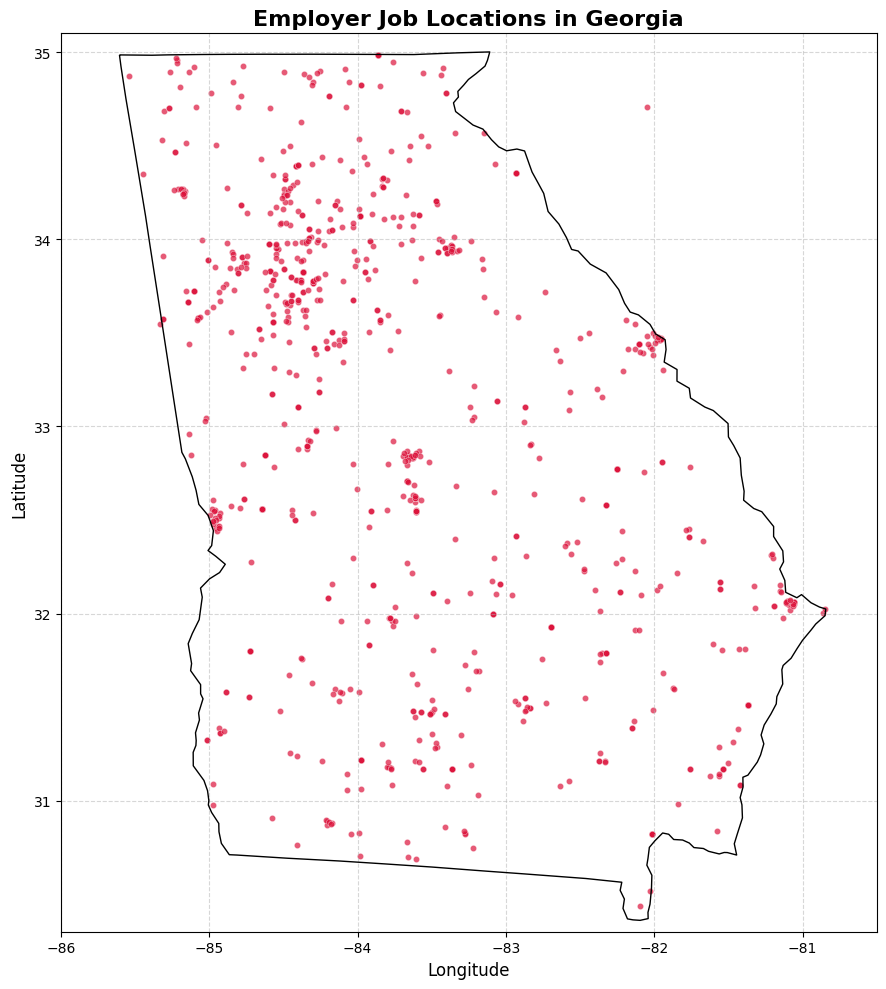

In [64]:
import geopandas as gpd
import matplotlib.pyplot as plt

jobs_subset = pd.read_csv("geocoded_jobs_checkpoint.csv")

geo_jobs = jobs_subset.dropna(subset=['latitude', 'longitude'])

gdf = gpd.GeoDataFrame(
    geo_jobs,
    geometry=gpd.points_from_xy(geo_jobs.longitude, geo_jobs.latitude),
    crs="EPSG:4326"
)

url = "https://www2.census.gov/geo/tiger/GENZ2022/shp/cb_2022_us_state_20m.zip"
states = gpd.read_file(url)
georgia = states[states.NAME == "Georgia"]

fig, ax = plt.subplots(figsize=(10, 10))

georgia.boundary.plot(ax=ax, edgecolor="black", linewidth=1)

gdf.plot(ax=ax, 
         markersize=20, 
         color="crimson", 
         alpha=0.7, 
         edgecolor='white', 
         linewidth=0.3)

ax.set_title("Employer Job Locations in Georgia", fontsize=16, fontweight='bold')
ax.set_xlabel("Longitude", fontsize=12)
ax.set_ylabel("Latitude", fontsize=12)
ax.grid(True, linestyle='--', alpha=0.5)
ax.set_xlim(-86, -80.5)
ax.set_ylim(30.3, 35.1)

plt.tight_layout()
plt.show()